## Final Project

## Predicting the probability of  a stroke

### Preprocessing

Import necessary libraries and dataset

In [3]:
import numpy as np
import pandas as pd

file_to_read=r'C:\Users\watso\Documents\Data_Science_Bootcamp\Final_Project\healthcare-dataset-stroke-data.csv'
df=pd.read_csv(file_to_read)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Check for null values

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Fill null values with mean

In [5]:
df_clean = df.fillna(value=df['bmi'].mean())

Check for imbalance in dataset - highly imbalanced.  Will need to make adjustments

In [6]:
df_clean['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Drop id column

In [7]:
df_clean = df_clean.drop('id', axis=1)

Check types for necessary one hot encoding

In [8]:
df_clean.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df_ohencoded = pd.get_dummies(df_clean)
pd.set_option('display.max_columns', None)
df_ohencoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


## Model Creation

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_


array([False, False, False, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
       False,  True, False])

### Logistic Regression

Simple

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [15]:
clf.score(X,y)

0.0487279843444227

Using SMOTE

In [16]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 4861, 0: 4861})


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

In [18]:
model = LogisticRegression(random_state=42)
model.fit(X_res, y_res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [19]:
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6045679012345679

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       972
           1       0.29      0.24      0.26        50

    accuracy                           0.93      1022
   macro avg       0.62      0.60      0.61      1022
weighted avg       0.93      0.93      0.93      1022



In [21]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predicted)

ValueError: Found input variables with inconsistent numbers of samples: [1022, 2555]

### Support Vector Machine

In [49]:
X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
from sklearn import svm


clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [51]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95146771037182


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2431
           1       0.00      0.00      0.00       124

    accuracy                           0.95      2555
   macro avg       0.48      0.50      0.49      2555
weighted avg       0.91      0.95      0.93      2555



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [30]:
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [72]:
X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [75]:
model=AdaBoostClassifier()
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)

print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.8740
Mean Precision: 0.5755
Mean Recall: 0.6728


In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
resample = SMOTEENN()
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)

print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))


Mean Accuracy: 0.8553
Mean Precision: 0.5494
Mean Recall: 0.6211


### K Nearest Neighbor

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [71]:
lr_probs = model.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.518


In [58]:
knn.score(X_test, y_test)

0.9495107632093933

In [2]:
import seaborn as sns
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

NameError: name 'y_test' is not defined

In [60]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[2424,    7],
       [ 122,    2]], dtype=int64)

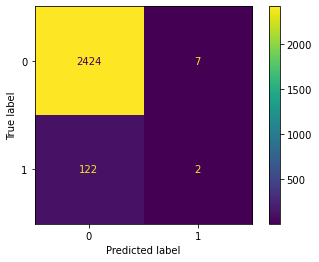

In [61]:
plot_confusion_matrix(knn, X_test, y_test)

### Keras Neural Network

In [62]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [63]:
n_cols = X_train.shape[1]
input_shape = (n_cols,)

model = Sequential()
model.add(Dense(50, activation='relu',input_shape=input_shape))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

80/80 [==============================] - 0s 2ms/step - loss: 0.7486 - accuracy: 0.9515
Test accuracy: 0.9514676928520203


In [64]:
confusion_matrix(y_test, y_predicted)

array([[2424,    7],
       [ 122,    2]], dtype=int64)

In [65]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2431
           1       0.22      0.02      0.03       124

    accuracy                           0.95      2555
   macro avg       0.59      0.51      0.50      2555
weighted avg       0.92      0.95      0.93      2555



### Pytorch Neural Network

In [165]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 4861, 0: 4861})


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [161]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

print(X_train)

ValueError: could not determine the shape of object type 'Series'

In [162]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=22, hidden1=50, hidden2=50, out_features =1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [163]:
torch.manual_seed(42)

model = ANN_Model()

In [164]:
loss_function = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

y_test = y_test.to(torch.float32)

AttributeError: 'Series' object has no attribute 'to'

In [ ]:
final_loss = []
n_epochs = 2000
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred.float(), y_train.float())
    final_loss.append(loss)
    
    if epoch % 20 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch